<a href="https://colab.research.google.com/github/Jeongchan-Kim/Drug-target-interaction-DTI-prediction/blob/main/Drug_Target_Interaction(DTI)_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import json
import numpy as np

# **Data Upload**

In [ ]:
!unzip /content/drive/MyDrive/DAVIS.zip

Archive:  /content/drive/MyDrive/DAVIS.zip
   creating: DAVIS/
  inflating: DAVIS/affinity.txt      
  inflating: __MACOSX/DAVIS/._affinity.txt  
  inflating: DAVIS/SMILES.txt        
  inflating: __MACOSX/DAVIS/._SMILES.txt  
  inflating: DAVIS/target_seq.txt    
  inflating: __MACOSX/DAVIS/._target_seq.txt  


In [ ]:
# drug - target binding affinity 데이터
affinity = pd.read_csv('/content/DAVIS/affinity.txt', header=None, sep = ' ')

# Target protein sequence 데이터
with open('/content/DAVIS/target_seq.txt') as f:
    target = json.load(f)
    target = list(target.values())

# Drug SMILES 데이터
with open('/content/DAVIS/SMILES.txt') as f:
    drug = json.load(f)
    drug = list(drug.values())

**Target Protein & Drug**

In [ ]:
print(f"총 protein 개수: {len(target)}")
print(f"총 drug 개수: {len(drug)}")

총 protein 개수: 442
총 drug 개수: 68


In [ ]:
print("Target protein sequence 예시: ")
print(target[0])
print("Drug SMILES 예시: ")
print(drug[0])

Target protein sequence 예시: 
MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL
Drug SMIL

# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# SMILES - Target - Affinity paired list 만들기

SMILES = [] 
Target_seq = []
y = []

for i in range(len(drug)):
  for j in range(len(target)):
    SMILES.append(drug[i])
    Target_seq.append(target[j])
    y.append(affinity.values[i, j])

In [ ]:
# Binding affinity cutoff로 affinity 이진화(binary)하기

threshold = 300 # Binding affinity cutoff

y = [1 if i else 0 for i in np.array(y) < threshold]

In [ ]:
# 모든 데이터 하나의 데이터 프레임으로 만들기

All_Data_dictionary = {"SMILES": SMILES,
                        "Target Sequence": Target_seq,
                        "Label":y}

df_data = pd.DataFrame(All_Data_dictionary)

In [ ]:
df_data

,SMILES,Target Sequence,Label
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,1
1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
2,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
3,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
4,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
...,...,...,...
30051,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,0
30052,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,0
30053,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,0
30054,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,0


In [ ]:
print(f'전체 drug-target pair 수: {str(len(df_data))}')

전체 drug-target pair 수: 30056


In [ ]:
# Label 비율 확인

import seaborn as sns
import matplotlib.pyplot as plt

counts = df_data['Label'].value_counts() # label counts
counts

0    26434
1     3622
Name: Label, dtype: int64

Text(0, 0.5, 'Counts')

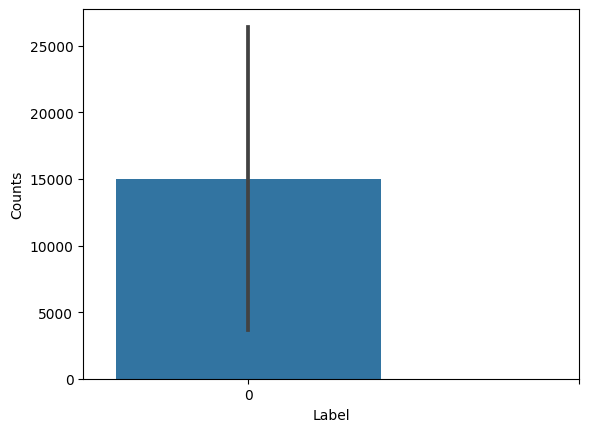

In [ ]:
x = np.array([0,1]) 

ax = plt.subplot()
sns.barplot(counts)
ax.set_xticks(x)

plt.xlabel("Label")
plt.ylabel("Counts")

In [ ]:
### 데이터 정제를 위한 설정 

# 아미노산 charater 정의
amino_char = ['?', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'O',
       'N', 'Q', 'P', 'S', 'R', 'U', 'T', 'W', 'V', 'Y', 'X', 'Z']

# SMILES character 정의
smiles_char = ['?', '#', '%', ')', '(', '+', '-', '.', '1', '0', '3', '2', '5', '4',
       '7', '6', '9', '8', '=', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I',
       'H', 'K', 'M', 'L', 'O', 'N', 'P', 'S', 'R', 'U', 'T', 'W', 'V',
       'Y', '[', 'Z', ']', '_', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i',
       'h', 'm', 'l', 'o', 'n', 's', 'r', 'u', 't', 'y']

# protein, drug 원핫(one-hot) 인코더
enc_protein = OneHotEncoder().fit(np.array(amino_char).reshape(-1, 1))
enc_drug = OneHotEncoder().fit(np.array(smiles_char).reshape(-1, 1))

# Protein 최대 길이
MAX_SEQ_PROTEIN = 1000

# Drug 최대 길이
MAX_SEQ_DRUG = 100

In [ ]:
def trans_drug(x):
	temp = list(x) # str -> list
	temp = [i if i in smiles_char else '?' for i in temp] # 사전 정의된 character에 없으면 ?로 변환

	if len(temp) < MAX_SEQ_DRUG: 
		# MAX_SEQ_DRUG 보다 작으면 뒷부분을 ?로 채워서 MAX_SEQ_DRUG 길이의 리스트로 만들기
		temp = temp + ['?'] * (MAX_SEQ_DRUG-len(temp))
	else:
		# MAX_SEQ_DRUG 보다 크면 앞에서부터 MAX_SEQ_DRUG 만큼 슬라이싱
		temp = temp[:MAX_SEQ_DRUG]

	return temp

In [ ]:
def trans_protein(x):

	temp = list(x.upper()) # 대문자로 바꾸기
	temp = [i if i in amino_char else '?' for i in temp] # 

	if len(temp) < MAX_SEQ_PROTEIN:
		# MAX_SEQ_PROTEIN 보다 작으면 뒷부분을 ?로 채워서 MAX_SEQ_DRUG 길이의 리스트로 만들기
		temp = temp + ['?'] * (MAX_SEQ_PROTEIN-len(temp))
	else:
		# MAX_SEQ_PROTEIN 보다 크면 앞에서부터 MAX_SEQ_DRUG 만큼 슬라이싱
		temp = temp [:MAX_SEQ_PROTEIN]

	return temp

In [ ]:
# Drug 데이터 중 중복되지 않는 것만 processing
unique_drug = pd.Series(df_data["SMILES"].unique()).apply(trans_drug)

# raw SMILES - processed SMILES 딕셔너리 
unique_dict = dict(zip(df_data["SMILES"].unique(), unique_drug))

# 전체 데이터 processing
df_data["drug_encoding"] = [unique_dict[i] for i in df_data["SMILES"]]

In [ ]:
# Protein 데이터 중 중복되지 않는 것만 processing
AA = pd.Series(df_data["Target Sequence"].unique()).apply(trans_protein)

# raw protein - processed protein 딕셔너리 
AA_dict = dict(zip(df_data["Target Sequence"].unique(), AA))

# 전체 데이터 processing
df_data["target_encoding"] = [AA_dict[i] for i in df_data["Target Sequence"]]

In [ ]:
def create_fold(df, fold_seed, frac):

    train_frac, val_frac, test_frac = frac 

    # Test 데이터 random sampling
    test = df.sample(frac = test_frac, replace = False, random_state = fold_seed)
    train_val = df[~df.index.isin(test.index)] # Train & Validation 데이터 

    # Validation 데이터 random sampling
    val = train_val.sample(frac = val_frac/(1-test_frac), replace = False, random_state = 1)
    train = train_val[~train_val.index.isin(val.index)] # Train 데이터
    
    return train, val, test

In [ ]:
train, val, test = create_fold(df_data, 22, [0.7,0.1,0.2])

In [ ]:
print(f'Train 데이터 크기: {len(train)}')
print(f'Validation 데이터 크기: {len(val)}')
print(f'Test 데이터 크기: {len(test)}')

Train 데이터 크기: 21039
Validation 데이터 크기: 3006
Test 데이터 크기: 6011


# **Drug & Protein Encoding Function**

In [ ]:
# Drug one-hot 인코딩

def drug_2_embed(x):
	return enc_drug.transform(np.array(x).reshape(-1,1)).toarray().T    

In [ ]:
# Protein one-hot 인코딩

def protein_2_embed(x):
	return enc_protein.transform(np.array(x).reshape(-1,1)).toarray().T

# **DataLoader**

In [ ]:
import torch
from torch import nn 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

In [ ]:
# 디바이스 설정

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda:0


In [ ]:
# Custom dataset 만들기 

class data_process_loader(Dataset):
    def __init__(self, df):
        """
        Args:
            df: Paired drug - protein - affinity dataframe
        """
        self.df = df

    def __len__(self):
        """샘플 개수
        """
        return self.df.shape[0] 

    def __getitem__(self, index):
        # Drug 데이터
        v_d = self.df.iloc[index]['drug_encoding'] 
        v_d = drug_2_embed(v_d) # Drug One-hot 인코딩 [63,100]

        # Target 데이터
        v_p = self.df.iloc[index]['target_encoding'] 
        v_p = protein_2_embed(v_p) # Target One-hot 인코딩 [26,100]

        # Binding affinity (label)
        y = self.df.iloc[index]['Label'] 

        return v_d, v_p, y

In [ ]:
train_dataset = data_process_loader(train)
valid_dataset = data_process_loader(val)
test_dataset = data_process_loader(test)

In [ ]:
# Dataset 확인 해보기 

for (v_d, v_p, y) in valid_dataset:
    print(v_d.shape)
    print(v_p.shape)
    print(y)
    break

(63, 100)
(26, 1000)
1


In [ ]:
# DataLoader 파라미터

params = {'batch_size': 256,
            'shuffle': True,
            'num_workers': 1,
            'drop_last': False}

In [ ]:
# Mini-batch 학습을 위한 DataLoader

training_generator = DataLoader(train_dataset, **params)
valid_generator = DataLoader(valid_dataset, **params)
test_generator = DataLoader(test_dataset, **params)

In [ ]:
# Dataloader 확인해보기 

for (v_d, v_p, y) in training_generator:
    print(v_d.shape)
    print(v_p.shape)
    print(y)

    drug_demo = v_d
    protein_demo = v_p
    affinity_demo = y
    break

torch.Size([256, 63, 100])
torch.Size([256, 26, 1000])
tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
for (v_d, v_p, y) in valid_generator:
    print(v_d.shape)
    print(v_p.shape)
    print(y)
    break

torch.Size([256, 63, 100])
torch.Size([256, 26, 1000])
tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
for (v_d, v_p, y) in test_generator:
    print(v_d.shape)
    print(v_p.shape)
    print(y)
    break

torch.Size([256, 63, 100])
torch.Size([256, 26, 1000])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


# **Binding affinity 예측 모델**

In [ ]:
# Drug data

# input data 
inp = drug_demo.double()
print(f"Input: {list(inp.shape)}") 

# 1D convolution 적용하기
conv1 = nn.Conv1d(in_channels = 63, out_channels = 32, kernel_size = 4).double()
drug_after_conv1 = F.relu(conv1(inp))
print(f"Conv1: {list(drug_after_conv1.shape)}") 

conv2 = nn.Conv1d(in_channels = 32, out_channels = 64, kernel_size = 6).double()
drug_after_conv2 = F.relu(conv2(drug_after_conv1))
print(f"Conv2: {list(drug_after_conv2.shape)}") 

conv3 = nn.Conv1d(in_channels = 64, out_channels = 96, kernel_size = 8).double()
drug_after_conv3 = F.relu(conv3(drug_after_conv2))
print(f"Conv3: {list(drug_after_conv3.shape)}") 

# # max pooling
# pooled = F.adaptive_max_pool1d(drug_after_conv3, output_size=1)
# print(f"Pooled: {list(pooled.shape)}") 

# # Linear embedding
# fc = nn.Linear(96, 256)
# pooled = pooled.view(pooled.size(0), -1) # [256, 96, 1] -> [256, 96]
# final = fc(pooled.float())
# print(f"Final: {list(final.shape)}") 

Input: [256, 63, 100]
Conv1: [256, 32, 97]
Conv2: [256, 64, 92]
Conv3: [256, 96, 85]


# **RNN DEMO**

In [ ]:
### Drug data

rnn_drug_n_layers = 2
rnn_drug_hid_dim = 64
hidden_dim_drug = 256

rnn = nn.GRU(input_size = 96, # input feature 사이즈 (마지막 convolution 이 후 채널 개수)
            hidden_size = rnn_drug_hid_dim, # hidden feature 사이즈
            num_layers = rnn_drug_n_layers, # recurrent layer 개수
            batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
            bidirectional = True) # If True, Bidirectional LSTM
            
rnn = rnn.double()

emb = drug_after_conv3

batch_size = emb.size(0)
emb = emb.view(batch_size, emb.size(2), -1) 
print(f"RNN 입력값: {list(emb.shape)}") 
# [256, 96, 85] -> [256, 85, 96]

# GRU
direction = 2 

h0 = torch.randn(rnn_drug_n_layers * direction, batch_size, rnn_drug_hid_dim).double() # Initialize hidden state 
print(f"hidden state: {list(h0.shape)}") # hidden state
v, hn = rnn(emb, h0) 

print(f"RNN 출력값: {list(v.shape)}") 

# Linear embedding
fc1 = nn.Linear(rnn_drug_hid_dim * direction * 85, hidden_dim_drug)
v = torch.flatten(v, 1)
v = fc1(v.float())
print(f"최종 임베딩 후 사이즈: {list(v.shape)}")

RNN 입력값: [256, 85, 96]
hidden state: [4, 256, 64]
RNN 출력값: [256, 85, 128]
최종 임베딩 후 사이즈: [256, 256]


# **MODEL**

In [ ]:
# 모델 설정 값

config = {
    # drug 설정
    "cnn_drug_filters" : [32,64,96],
    "cnn_drug_kernels" : [4,6,8],
    "hidden_dim_drug" : 256,
    "rnn_drug_hid_dim" : 64,
    "rnn_drug_n_layers" : 2,
    "rnn_drug_bidirectional" : True,
    "rnn_Use_GRU_LSTM_target" : 'GRU',

    # protein 설정
    "cnn_target_filters" : [32,64,96],
    "cnn_target_kernels" : [4,8,12],
    "hidden_dim_protein" : 256,
    "rnn_target_hid_dim" : 64,
    "rnn_target_n_layers" : 2,
    "rnn_target_bidirectional" : True,
    "rnn_Use_GRU_LSTM_drug" : 'GRU',

    # Classfier 설정
    "cls_hidden_dims" : [1024, 1024, 512]
    }

In [ ]:
# CNN - RNN 모델 

class CNN_RNN(nn.Sequential):
	"""CNN과 RNN을 이용하여 특성 추출(feature extration)
	"""
	def __init__(self, encoding, **config):
		super(CNN_RNN, self).__init__()
  
		if encoding == 'drug':
			"""
			CNN 구현 
			"""
			# 레이어 별 CNN 필터 개수 
			in_ch = [63] + config['cnn_drug_filters']
			self.in_ch = in_ch[-1] # 마지막 convolution 층 필터 개수

			# 레이어 별 CNN kernel 사이즈
			kernels = config['cnn_drug_kernels']

			# 전체 CNN Layer 개수
			layer_size = len(config['cnn_drug_filters'])
   
			self.conv = nn.ModuleList([nn.Conv1d(in_channels = in_ch[i], # input 채널 수
													out_channels = in_ch[i+1], # output 채널 수
													kernel_size = kernels[i]) for i in range(layer_size)]) # kernel 사이즈
			self.conv = self.conv.double()

			# 마지막 층 사이즈 구하기
			n_size_d = self._get_conv_output((63, 100)) # auto get the seq_len of CNN output

			"""
			RNN 구현 (LSTM / GRU)
			"""
			if config['rnn_Use_GRU_LSTM_drug'] == 'LSTM':
				self.rnn = nn.LSTM(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_drug_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_drug_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
								bidirectional = config['rnn_drug_bidirectional']) # If True, Bidirectional LSTM
			
			elif config['rnn_Use_GRU_LSTM_drug'] == 'GRU':
				self.rnn = nn.GRU(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_drug_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_drug_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature
								bidirectional = config['rnn_drug_bidirectional']) # If True, Bidirectional LSTM
			else:
				raise AttributeError('Please use LSTM or GRU.')

			direction = 2 if config['rnn_drug_bidirectional'] else 1
			self.rnn = self.rnn.double()
   
			# 마지막 drug 임베딩 층
			self.fc1 = nn.Linear(config['rnn_drug_hid_dim'] * direction * n_size_d, config['hidden_dim_drug'])

		if encoding == 'protein':
			"""
			CNN 구현 
			"""
			# 레이어 별 CNN 필터 개수 
			in_ch = [26] + config['cnn_target_filters']
			self.in_ch = in_ch[-1]

			# 레이어 별 CNN kernel 사이즈
			kernels = config['cnn_target_kernels']

			# 전체 CNN Layer 개수
			layer_size = len(config['cnn_target_filters'])

			self.conv = nn.ModuleList([nn.Conv1d(in_channels = in_ch[i], # input 채널 수
													out_channels = in_ch[i+1], # output 채널 수
													kernel_size = kernels[i]) for i in range(layer_size)]) # kernel 사이즈
			self.conv = self.conv.double()
   
			# 마지막 층 사이즈 구하기
			n_size_p = self._get_conv_output((26, 1000))
   
			"""
			RNN 구현 (LSTM / GRU)
			"""
			if config['rnn_Use_GRU_LSTM_target'] == 'LSTM':
				self.rnn = nn.LSTM(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_target_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_target_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
								bidirectional = config['rnn_target_bidirectional']) # If True, Bidirectional LSTM

			elif config['rnn_Use_GRU_LSTM_target'] == 'GRU':
				self.rnn = nn.GRU(input_size = in_ch[-1], 
								hidden_size = config['rnn_target_hid_dim'],
								num_layers = config['rnn_target_n_layers'],
								batch_first = True,
								bidirectional = config['rnn_target_bidirectional'])
			else:
				raise AttributeError('Please use LSTM or GRU.')

			direction = 2 if config['rnn_target_bidirectional'] else 1
			self.rnn = self.rnn.double()
   
			# 마지막 protein 임베딩 층
			self.fc1 = nn.Linear(config['rnn_target_hid_dim'] * direction * n_size_p, config['hidden_dim_protein'])
   
		self.encoding = encoding
		self.config = config

	def _get_conv_output(self, shape):
		"""마지막 
		"""
		bs = 1
		input = Variable(torch.rand(bs, *shape))
		output_feat = self._forward_features(input.double())
		n_size = output_feat.data.view(bs, self.in_ch, -1).size(2)
		return n_size

	def _forward_features(self, x):
		for l in self.conv:
			x = F.relu(l(x))
		return x

	def forward(self, v):
		v = self._forward_features(v.double())
  
		batch_size = v.size(0)
		v = v.view(batch_size, v.size(2), -1) 
  		# drug: [256, 96, 85] -> [256, 85, 96]
		# protein: [256, 96, 979] -> [256, 979, 96]

		if self.encoding == 'protein':
			if self.config['rnn_Use_GRU_LSTM_target'] == 'LSTM':
				direction = 2 if self.config['rnn_target_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device) # Initialize hidden state
				c0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device) # Initialize cell state
				v, (hn, cn) = self.rnn(v.double(), (h0.double(), c0.double()))
			else:
				# GRU
				direction = 2 if self.config['rnn_target_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device)
				v, hn = self.rnn(v.double(), h0.double())
		else:
			if self.config['rnn_Use_GRU_LSTM_drug'] == 'LSTM':
				direction = 2 if self.config['rnn_drug_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device) # Initialize hidden state
				c0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device) # Initialize cell state
				v, (hn, cn) = self.rnn(v.double(), (h0.double(), c0.double()))
			else:
				# GRU
				direction = 2 if self.config['rnn_drug_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device)
				v, hn = self.rnn(v.double(), h0.double())
				
		v = torch.flatten(v, 1)
		v = self.fc1(v.float())
		return v

In [ ]:
class Classifier(nn.Sequential):
	
	def __init__(self, model_drug, model_protein, **config):
	
		super(Classifier, self).__init__()

		self.input_dim_drug = config['hidden_dim_drug'] # drug feature 사이즈
		self.input_dim_protein = config['hidden_dim_protein'] # protein feature 사이즈

		self.model_drug = model_drug # drug 임베딩 모델
		self.model_protein = model_protein # protein 임베딩 모델

		self.dropout = nn.Dropout(0.1) # dropout 적용

		self.hidden_dims = config['cls_hidden_dims'] # classifier hidden dimensions
		layer_size = len(self.hidden_dims) + 1 # hidden layer 개수
		dims = [self.input_dim_drug + self.input_dim_protein] + self.hidden_dims + [1] # ["합쳐진 feature 차원 (drug + protein), hidden1, hidden2, hidden3, 1 (output layer)] 
		
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)]) # classifer layers 

	def forward(self, v_D, v_P):
		# Drug/protein 임베딩
		v_D = self.model_drug(v_D)
		v_P = self.model_protein(v_P)
  
		# drug - protein feature 합치기 
		v_f = torch.cat((v_D, v_P), 1)
  
		for i, l in enumerate(self.predictor):
			if i == (len(self.predictor)-1):
				# If last layer,
				v_f = l(v_f)
			else:
				# If Not last layer, dropout과 ReLU 적용
				v_f = F.relu(self.dropout(l(v_f)))
	
		return v_f

In [ ]:
# model for drug
model_drug = CNN_RNN('drug', **config)

# model for protein
model_protein = CNN_RNN('protein', **config)

# classifier
model = Classifier(model_drug, model_protein, **config)

model = model.to(device) 

# **Training**

In [ ]:
import copy
from prettytable import PrettyTable
from time import time

from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score, log_loss

In [ ]:
# Hyperparameter
learning_rate = 0.001
weight_decay  = 0.00001
train_epoch   = 15

In [ ]:
# 옵티마이저 선언
opt = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay) # Adam optimizer

# 손실 함수 선언
loss_fct = torch.nn.BCELoss()

# 시그모이드(sigmoid) 함수
sigmoid = torch.nn.Sigmoid() 

In [ ]:
def get_metrics(y_label, y_pred):
    # metrics
    auc = roc_auc_score(y_label, y_pred) # AUC 
    auprc = average_precision_score(y_label, y_pred) # Average Precision
    f1 = f1_score(y_label, outputs) # F1 score
    lloss = log_loss(y_label, outputs) # cross-entropy loss 

    return auc, auprc, f1, lloss

In [ ]:
loss_history = [] 

max_auc = 0 # 최고 AUC 저장
model_max = copy.deepcopy(model) # 최고 AUC 저장

valid_metric_record = [] # 각 metrics 저장
valid_metric_header = ["# epoch"] 
valid_metric_header.extend(["AUROC", "AUPRC", "F1"])

table = PrettyTable(valid_metric_header)

float2str = lambda x:'%0.4f'%x  # float 자료 형 str로 만들기 (소숫점 4자리까지)

print('--- Go for Training ---')
t_start = time() 


for epoch in range(train_epoch):
    # Training
    model.train() 

    for i, (v_d, v_p, label) in enumerate(training_generator):
        v_p = v_p.float().to(device) 
        v_d = v_d.float().to(device) 
        
        # 순전파 (forward-pass)
        score = model(v_d, v_p)
        label = Variable(torch.from_numpy(np.array(label)).float()).to(device) # label numpy -> torch tensor
        
        # 모델 아웃풋 score -> probability
        n = torch.squeeze(sigmoid(score), 1)
        
        # 손실 값(loss) 계산
        loss = loss_fct(n, label)            
        loss_history.append(loss.item()) # loss 기록

        opt.zero_grad() # gradient 초기화
        loss.backward() # back propagation
        opt.step() # parameter 업데이트

    # Validation
    model.eval()
    with torch.set_grad_enabled(False):
        y_pred = []
        y_label = []

        for i, (v_d, v_p, label) in enumerate(valid_generator):
            v_p = v_p.float().to(device) 
            v_d = v_d.float().to(device) 

            # 순전파 (forward-pass)
            score = model(v_d, v_p)
            
            logits = torch.squeeze(sigmoid(score)).detach().cpu().numpy() # 예측 확률
            label_ids = label.to('cpu').numpy() # 참 값 

            y_label = y_label + label_ids.flatten().tolist()
            y_pred = y_pred + logits.flatten().tolist() 

    # 예측 값 
    outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)]) 

    # model evaluation
    auc, auprc, f1, lloss = get_metrics(y_label, y_pred)

    lst = ["epoch " + str(epoch)] + list(map(float2str,[auc, auprc, f1]))
    valid_metric_record.append(lst)

    if auc > max_auc:
        # 이전 epoch 보다 AUC 좋아지면 model_max, max_auc 갱신
        model_max = copy.deepcopy(model)
        max_auc = auc   

    print('Validation at Epoch '+ str(epoch + 1) + ', AUROC: ' + str(auc)[:7] + \
            ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + \
            str(lloss)[:7])
    
    
    table.add_row(lst)

--- Go for Training ---
Validation at Epoch 1, AUROC: 0.61772 , AUPRC: 0.15992 , F1: 0.0 , Cross-entropy Loss: 3.82499
Validation at Epoch 2, AUROC: 0.74669 , AUPRC: 0.30388 , F1: 0.00619 , Cross-entropy Loss: 3.84897
Validation at Epoch 3, AUROC: 0.81515 , AUPRC: 0.40025 , F1: 0.04863 , Cross-entropy Loss: 3.75304
Validation at Epoch 4, AUROC: 0.83435 , AUPRC: 0.44860 , F1: 0.38736 , Cross-entropy Loss: 3.48925
Validation at Epoch 5, AUROC: 0.84274 , AUPRC: 0.47019 , F1: 0.37610 , Cross-entropy Loss: 3.38134
Validation at Epoch 6, AUROC: 0.85587 , AUPRC: 0.51202 , F1: 0.46706 , Cross-entropy Loss: 3.20148
Validation at Epoch 7, AUROC: 0.86604 , AUPRC: 0.50714 , F1: 0.44017 , Cross-entropy Loss: 3.14152
Validation at Epoch 8, AUROC: 0.87085 , AUPRC: 0.51975 , F1: 0.35944 , Cross-entropy Loss: 3.33337
Validation at Epoch 9, AUROC: 0.86444 , AUPRC: 0.53603 , F1: 0.31234 , Cross-entropy Loss: 3.27342
Validation at Epoch 10, AUROC: 0.87488 , AUPRC: 0.55799 , F1: 0.48030 , Cross-entropy Los

# **TEST**

In [ ]:
model.eval()

y_pred = []
y_label = []
y_outputs = []

for i, (v_d, v_p, label) in enumerate(test_generator):
    v_p = v_p.float().to(device) 
    v_d = v_d.float().to(device) 
    
    # 순전파(forward-pass)
    score = model(v_d, v_p) 
    logits = torch.squeeze(sigmoid(score)).detach().cpu().numpy()

    label_ids = label.to('cpu').numpy()
    y_label = y_label + label_ids.flatten().tolist()
    y_pred = y_pred + logits.flatten().tolist()
    outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)])

    y_outputs.append(outputs)

In [ ]:
# model evaluation
auc, auprc, f1, lloss = get_metrics(y_label, y_pred)

print('Test result - ' + ', AUROC: ' + str(auc)[:7] + ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + str(loss)[:7])

Test result - , AUROC: 0.90664 , AUPRC: 0.62333 , F1: 0.45015 , Cross-entropy Loss: tensor(


In [ ]:
def roc_curve(y_pred, y_label, figure_file, method_name):

	import matplotlib.pyplot as plt
	from sklearn.metrics import roc_curve, auc
	from sklearn.metrics import roc_auc_score

	y_label = np.array(y_label)
	y_pred = np.array(y_pred)	
 
	fpr = dict()
	tpr = dict() 
	roc_auc = dict()
 
	fpr[0], tpr[0], _ = roc_curve(y_label, y_pred) # FPR / TPR 구하기
	roc_auc[0] = auc(fpr[0], tpr[0]) # AUC 구하기
	
	# ROC 커브 그리기
	lw = 2
	plt.plot(fpr[0], tpr[0],
         lw=lw, label= method_name + ' (area = %0.2f)' % roc_auc[0])
	plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	fontsize = 14
	plt.xlabel('False Positive Rate', fontsize = fontsize)
	plt.ylabel('True Positive Rate', fontsize = fontsize)
	plt.title('Receiver Operating Characteristic Curve')
	plt.legend(loc="lower right")
	plt.savefig(figure_file)
 

def prauc_curve(y_pred, y_label, figure_file, method_name):

	import matplotlib.pyplot as plt
	from sklearn.metrics import precision_recall_curve, average_precision_score
	from sklearn.metrics import f1_score
	from sklearn.metrics import auc

	lr_precision, lr_recall, _ = precision_recall_curve(y_label, y_pred) # precision, recall 구하기
	
	# 커브 그리기
	plt.plot(lr_recall, lr_precision, lw = 2, label= method_name + ' (area = %0.2f)' % average_precision_score(y_label, y_pred))
	fontsize = 14
	plt.xlabel('Recall', fontsize = fontsize)
	plt.ylabel('Precision', fontsize = fontsize)
	plt.title('Precision Recall Curve')
	plt.legend()
	plt.savefig(figure_file)


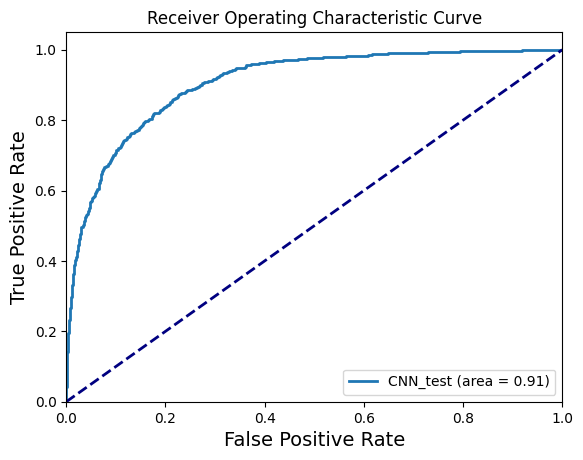

In [ ]:
roc_curve(y_pred, y_label, "CNN_test.png", "CNN_test")

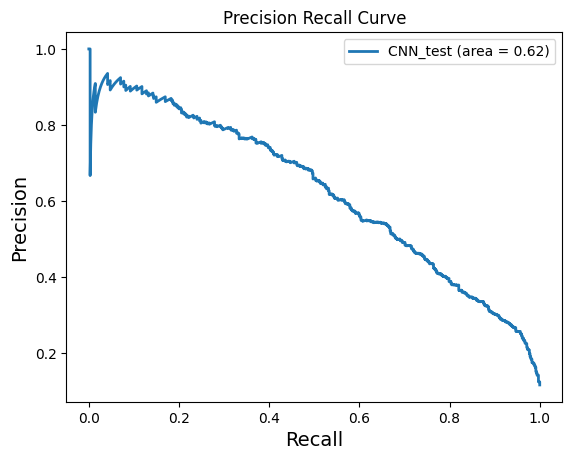

In [ ]:
prauc_curve(y_pred, y_label, "CNN_test.png", "CNN_test")